In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

In [112]:
rst = pd.read_excel('../data/ERR.xlsx', sheet_name='Restaurants')
rev = pd.read_excel('../data/ERR.xlsx', sheet_name='Reviews')


In [113]:
rst.head()
print(rst.shape)
rst.columns

(68, 7)


Index(['Restaurant Name', 'Cuisine', 'Latitude', 'Longitude', 'Average Cost',
       'Open After 8pm?', 'Brief Description'],
      dtype='object')

In [114]:
rev.head()
print(rev.columns)
rev.shape

Index(['Reviewer Name', 'Restaurant Name', 'Rating', 'Review Text',
       'Date of Review', 'Birth Year', 'Marital Status', 'Has Children?',
       'Vegetarian?', 'Weight (lb)', 'Height (cm)', 'Average Amount Spent',
       'Preferred Mode of Transport', 'Northwestern Student?'],
      dtype='object')


(1500, 14)

In [115]:
rev.head()

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (cm),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
0,Dan B,Lao Sze Chuan,1,Really disappointed for the dishes…. Not athle...,2022-08-10 00:00:00,1942.0,Single,No,NaN,234.0,161.0,Medium,Car Owner,No
1,A B,Barn Steakhouse,5,Excellent meal in a warm atmosphere! The space...,2022-11-22 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No
2,A B,Brothers K Coffeehouse,4,NaN,2022-08-18 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No
3,A B,Clarkes Off Campus,5,Best burger in Evanston,2022-10-30 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No
4,A B,Edzo's Burger Shop,5,Second best burger in Evanston,2022-11-28 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No


In [116]:
rev.sort_values(by = 'Birth Year') # 1938--2005

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (cm),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
1028,Rick Stevens,Papa Bop,1,Order the short ribs got something else with t...,2023-02-17 00:00:00,1938.0,Widow,No,NaN,NaN,NaN,Low,On Foot,No
119,Bob Smith,Taco Diablo,4,NaN,2022-09-04 00:00:00,1938.0,Married,No,NaN,222.0,153.0,Low,Public Transit,No
1492,Frederick Sanders,Guzman y Gomez,3,Decent food and appreciate the ability to mix ...,2025-03-25 00:00:00,1938.0,Widowed,Yes,NaN,119.0,152.0,Low,On Foot,No
114,Bob Smith,Chipotle,5,NaN,2022-09-04 00:00:00,1938.0,Married,No,NaN,222.0,153.0,Low,Public Transit,No
115,Bob Smith,Claire's Korner,4,NaN,2022-09-04 00:00:00,1938.0,Married,No,NaN,222.0,153.0,Low,Public Transit,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,Carolina Woods,Chipotle,1,"Went to Chipotle today for lunch, the associat...",2022-02-24 00:00:00,2005.0,Single,No,NaN,193.0,160.0,Low,On Foot,Yes
1422,Pamela Leblanc,Chipotle,1,Went to this chipotle on 02/25/22. Proceeded t...,2022-02-25 00:00:00,2005.0,Single,No,NaN,145.0,159.0,Low,On Foot,Yes
1054,Roman Baird,Dos Bros,5,Really nice people. Great nachos. Amazing serv...,2025-04-19 00:00:00,2025.0,Single,No,NaN,294.0,153.0,Medium,On Foot,No
68,Anwaar,Panino's Pizzeria,3,Place is quiet. After 3 pm no dine in. When qu...,2022-12-15 00:00:00,NaN,Single,Yes,NaN,208.0,150.0,Medium,Car Owner,No


Missing variables:
1. Check rst, rev seperately (use sum not count, because count only account for non-null values)
1) Review Text: add flag
2) Vegetarian: drop
3) Weight, Height use the median
4) Has Childen, marital status: use the mode
5) others: drop directly.

In [117]:
rst_missing_count = rst.isnull().sum().reset_index()
rst_missing_count.columns = ['Name', 'Number of Missing values']
rst_missing_count['Proportion of missingness'] = rst_missing_count['Number of Missing values']/len(rst)
rev_missing_count = rev.isnull().sum().reset_index()
rev_missing_count.columns = ['Name', 'Number of Missing values']
rev_missing_count['Proportion of missingness'] = rev_missing_count['Number of Missing values']/len(rev)
missing_count = pd.concat([rst_missing_count, rev_missing_count], ignore_index=True)
missing_count.sort_values(by = 'Number of Missing values', ascending= False)

,Name,Number of Missing values,Proportion of missingness
15,Vegetarian?,1405,0.936667
10,Review Text,574,0.382667
16,Weight (lb),97,0.064667
17,Height (cm),54,0.036000
14,Has Children?,38,0.025333
13,Marital Status,35,0.023333
19,Preferred Mode of Transport,4,0.002667
12,Birth Year,2,0.001333
18,Average Amount Spent,1,0.000667
11,Date of Review,0,0.000000


In [118]:
revc = rev.drop(columns=['Vegetarian?'])
revc['rev_flag'] = np.where(revc['Review Text'].isna(), 1, 0)
revc['Height (cm)'] = revc['Height (cm)'].fillna(revc['Height (cm)'].median())
revc['Weight (lb)'] = revc['Weight (lb)'].fillna(revc['Weight (lb)'].median())
revc['Has Children?'] = revc['Has Children?'].fillna(revc['Has Children?'].mode()[0])
revc['Marital Status'] = revc['Marital Status'].fillna(revc['Marital Status'].mode()[0])
# rst['Review Text'].apply(lambda x: 1 if pd.isna(x) else 0)

In [119]:
revc.shape

(1500, 14)

In [120]:
revc.isnull().sum()

Reviewer Name                    0
Restaurant Name                  0
Rating                           0
Review Text                    574
Date of Review                   0
Birth Year                       2
Marital Status                   0
Has Children?                    0
Weight (lb)                      0
Height (cm)                      0
Average Amount Spent             1
Preferred Mode of Transport      4
Northwestern Student?            0
rev_flag                         0
dtype: int64

Categorical Data: there is only barplot, not histogram since they are discrete
Numerical Data: histogram.

Outliers: 1) Birth Year: 2025, can't write the evaluation
2) Weight too much, there are some people

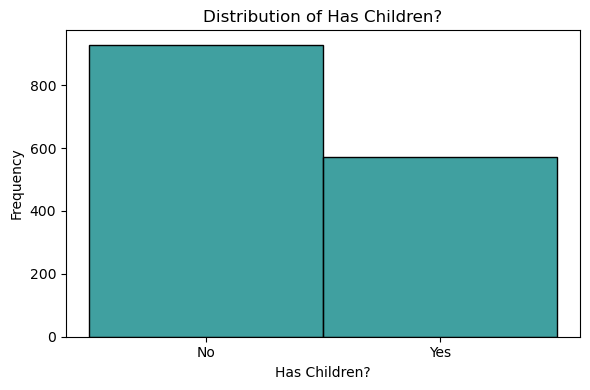

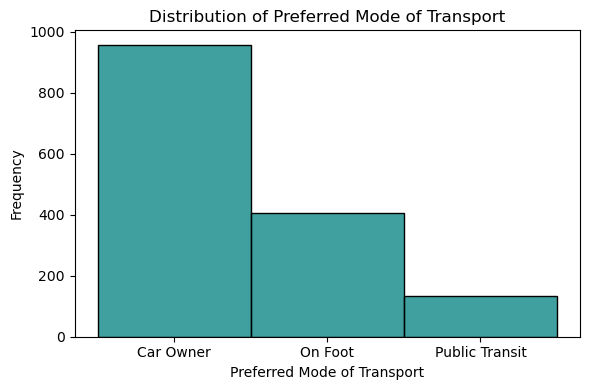

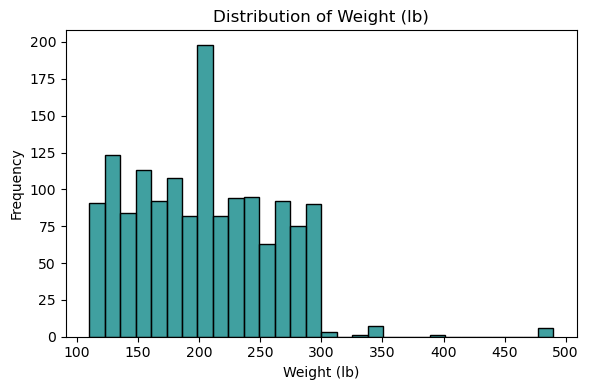

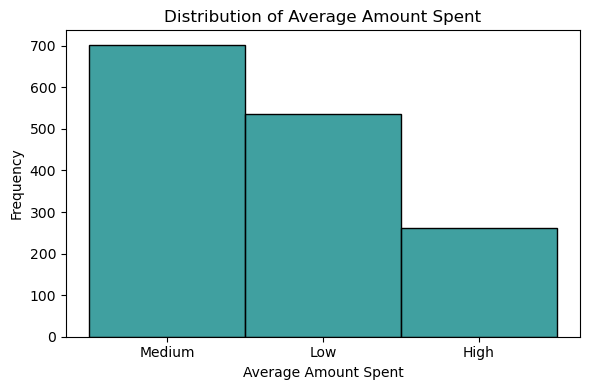

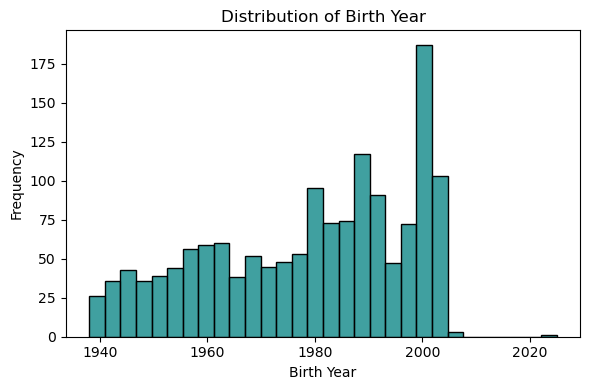

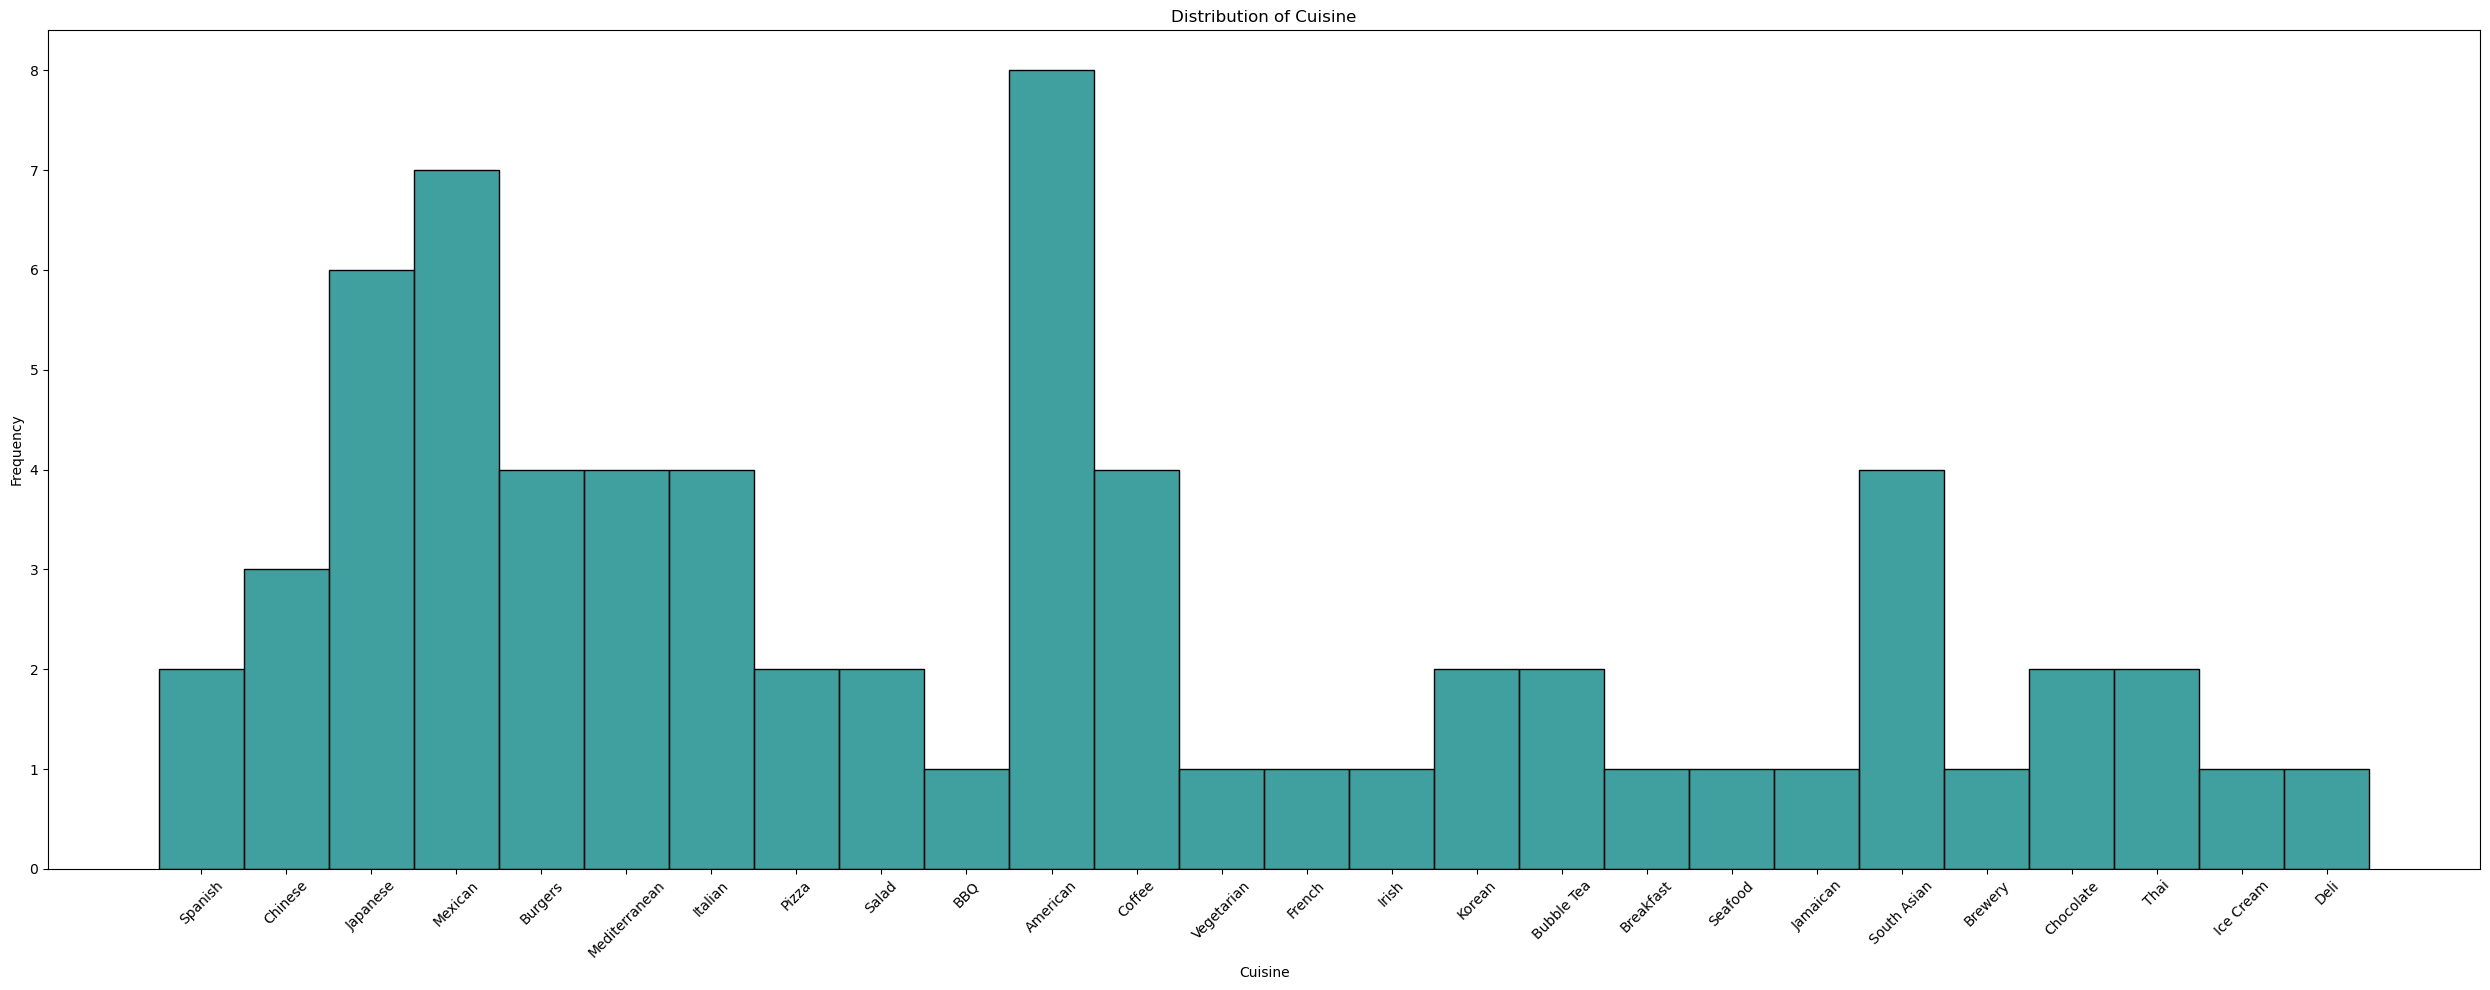

In [121]:
categorical_vars = ['Has Children?', 'Preferred Mode of Transport', 'Weight (lb)', 'Average Amount Spent', 'Birth Year']

# Categorical plots (like bar plots for count)
# for col in categorical_vars:
#     plt.figure(figsize=(8, 5))
#     ax = sns.countplot(data=revc, x=col, hue = col, palette='viridis', order=revc[col].value_counts().index)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# Numerical histograms
for col in categorical_vars:
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=revc, x = col, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


# cuisine methods
plt.figure(figsize=(25, 10))
ax = sns.histplot(data=rst, x = 'Cuisine', bins=30, color='teal')
plt.title(f'Distribution of Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()    




In [122]:
# deal with the outliers
revc = revc[revc['Birth Year']<2025.0]
revc = revc[revc['Weight (lb)']<=350.]
revc.shape

(1490, 14)

Perform clustering on one-hot encoded user demographic data to identify distinct user groups. Use algorithms such as K-Means, DBSCAN, and Agglomerative Clustering, adjusting their parameters to discover meaningful clusters. For each identified cluster, calculate the average review score and look for trends. Present your findings in a clear format, preferably using tables.

Before clustering, I dropped the duplicated rows based on the reviewers, because we only care about reviewers not the reviews. We renamed our dataset as rev2.

I used these numerical variables: weight(lb); height(in); Age
Categorical data = []

In [123]:
# compute the age for the person, convert date of review into the year format
revc['date_review_flag'] = np.where(pd.to_datetime(revc['Date of Review'], errors='coerce').isna(), 1, 0)

#  print the bad-format data
print(revc.loc[revc['date_review_flag'] == 1, 'Date of Review'])

# they got the wrong format, so I decided to correct their format manually
revc['Review Year'] = np.where(
    revc['date_review_flag'] == 1,
    2022,  # if wrong, we let it equal to 2022.
    pd.to_datetime(revc['Date of Review'], errors='coerce').dt.year
)
revc['Age'] = revc['Review Year'] - revc['Birth Year']
print(revc['Age'])


67       4-0-2022
334     10-0-2022
439     11-0-2022
456      4-0-2022
556      4-0-2022
770      6-0-2022
799      2-0-2022
924      8-0-2022
930     10-0-2022
938      8-0-2022
1019     6-0-2022
1199     5-0-2022
1306    10-0-2022
1320     2-0-2022
1425     2-0-2022
Name: Date of Review, dtype: object
0       80.0
1       24.0
2       24.0
3       24.0
4       24.0
        ... 
1495    33.0
1496    65.0
1497    44.0
1498    36.0
1499    50.0
Name: Age, Length: 1490, dtype: float64


In [124]:
revc.to_csv('../data/cleaned_err.csv')

I used the Agglomerative Clustering methods, 

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [126]:
def euclidean_dist(lat1, lon1, lat2, lon2):
    return (lat1 - lat2)**2 + (lon1 - lon2) ** 2

def cosine_dist(lat1, lon1, lat2, lon2):
    return np.dot(lat1 - lat2, lon1 - lon2) / (np.linalg.norm(lat1 - lat2) * np.linalg.norm(lon1 - lon2))

# Note that you will need to compute a numeric embedding of the categorical variables.
rst = pd.read_excel('../data/ERR.xlsx', sheet_name='Restaurants')
print(rst.columns)

Index(['Restaurant Name', 'Cuisine', 'Latitude', 'Longitude', 'Average Cost',
       'Open After 8pm?', 'Brief Description'],
      dtype='object')


In [127]:
rst = pd.read_excel('../data/ERR.xlsx', sheet_name='Restaurants')
rev = pd.read_csv('../data/cleaned_err.csv')
unique_rst_name = rev['Restaurant Name'].unique()
unique_rev_name = rst['Restaurant Name'].unique()
common_restaurant_names = np.intersect1d(unique_rst_name, unique_rev_name)
print(len(common_restaurant_names))
# combine the rst and rev file, and if not in the rst file, we dropped the reviews directly.
print(rst.shape)
revc = pd.merge(rst, rev, on='Restaurant Name', how='inner')
revc.groupby('Restaurant Name')['Brief Description'].count()
# Find restaurants in rst that are not in revc
missing_restaurants = pd.merge(rst, revc, on='Restaurant Name', how='outer', indicator=True)
missing_in_revc = missing_restaurants[missing_restaurants['_merge'] == 'left_only']
print(missing_in_revc)

# unique_count = test_data.groupby('Restaurant Name')['Rating'].count()
# print(sorted(unique_count))# 66 * 1

66
(68, 7)
     Restaurant Name  Cuisine_x  Latitude_x Longitude_x  Average Cost_x  \
605         Kilwin's  Chocolate   42.049490  -87.682076              20   
1046        Shinsen    Japanese   42.042173  -87.680221              20   

     Open After 8pm?_x                                Brief Description_x  \
605                Yes  Old-fashioned confectionery chain known for ch...   
1046               Yes  BYOB spot for a variety of noodle dishes, sush...   

     Cuisine_y  Latitude_y Longitude_y  ...  Weight (lb) Height (cm)  \
605        NaN         NaN         NaN  ...          NaN         NaN   
1046       NaN         NaN         NaN  ...          NaN         NaN   

     Average Amount Spent  Preferred Mode of Transport Northwestern Student?  \
605                   NaN                          NaN                   NaN   
1046                  NaN                          NaN                   NaN   

      rev_flag date_review_flag Review Year  Age     _merge  
605        

In [128]:
rev.isnull().sum()

Unnamed: 0                       0
Reviewer Name                    0
Restaurant Name                  0
Rating                           0
Review Text                    571
Date of Review                   0
Birth Year                       0
Marital Status                   0
Has Children?                    0
Weight (lb)                      0
Height (cm)                      0
Average Amount Spent             1
Preferred Mode of Transport      4
Northwestern Student?            0
rev_flag                         0
date_review_flag                 0
Review Year                      0
Age                              0
dtype: int64

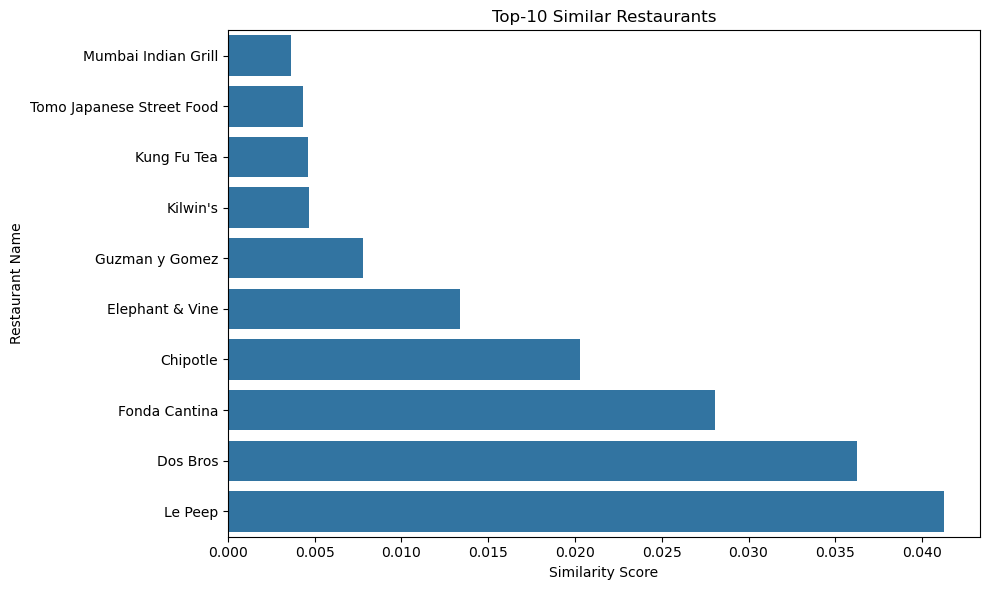

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the data
data = {
    'Name': [
        'Mumbai Indian Grill',
        'Tomo Japanese Street Food',
        'Kung Fu Tea',
        "Kilwin's",
        'Guzman y Gomez',
        'Elephant & Vine',
        'Chipotle',
        'Fonda Cantina',
        'Dos Bros',
        'Le Peep'
    ],
    'Similarity': [
        0.003618,
        0.004322,
        0.004645,
        0.004659,
        0.007797,
        0.013392,
        0.020295,
        0.028083,
        0.036247,
        0.041273
    ]
}

df = pd.DataFrame(data)

# Step 2: Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Similarity', y='Name', orient='h')  # Horizontal bar plot
plt.title('Top-10 Similar Restaurants')
plt.xlabel('Similarity Score')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()
